
# Knock Airport Weather Data Assignment

Create a python file or notebook called assignment_6_Weather (.py or .ipynb)

Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

(This is different that the data I used in the lecture)

Plot:

The temperature
The mean temperature each day
The mean temperature for each month
60% of the marks will be given for the above

For the last 40%

Plot:

The Windspeed (there is data missing from this column)
The rolling windspeed (say over 24 hours)
The max windspeed for each day
The monthly mean of the daily max windspeeds (yer I am being nasty here)
You do not need to over comment your code. Marks will be given for how nice the plots are.

## Header Meanings
- date:  -  Date and Time (utc)
- rain:  -  Precipitation Amount (mm)	  
- temp:  -  Air Temperature (C)	
- wetb:  -  Wet Bulb Temperature (C)
- dewpt: -  Dew Point Temperature (C)             
- rhum:  -  Relative Humidity (%)
- vappr: -  Vapour Pressure (hPa)	 
- msl:   -  Mean Sea Level Pressure (hPa)
- wdsp:  -  Mean Wind Speed (knot)
- wddir: -  Predominant Wind Direction (degree)
- ww:    -  Synop code for Present Weather
- w:     -  Synop code for Past Weather
- sun:   -  Sunshine duration (hours)
- vis:   -  Visibility (m)
- clht:  -  Cloud height (100's of ft) - 999 if none 
- clamt: -  Cloud amount
- ind:   -  Indicator

 Author: Emmet Devaney

## Importing the Necesary Libraries.

In [41]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




# Headers

Below we will re-write the headers for two reasons:

1. Some headers have the same name
2. We will be re-doing the date column for more detail.

In [42]:
names = ['date','ind(1)','rain','ind','temp','ind(2)','wetb','dewpt','vappr','rhum','msl','ind(3)','wdsp','ind(4)','wddir','ww','w','sun','vis','clht','clamt']

df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", header=None, names=names, skiprows=22,   low_memory=False)
df.head(3)

,date,ind(1),rain,ind,temp,ind(2),wetb,dewpt,vappr,rhum,...,ind(3),wdsp,ind(4),wddir,ww,w,sun,vis,clht,clamt
0,date,ind,rain,ind,temp,ind,wetb,dewpt,vappr,rhum,...,ind,wdsp,ind,wddir,ww,w,sun,vis,clht,clamt
1,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
2,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5


## Inspecting Our Data

In [43]:
info = df.info ()
print (info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248395 entries, 0 to 248394
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    248395 non-null  object
 1   ind(1)  248395 non-null  object
 2   rain    248395 non-null  object
 3   ind     248395 non-null  object
 4   temp    248395 non-null  object
 5   ind(2)  248395 non-null  object
 6   wetb    248395 non-null  object
 7   dewpt   248395 non-null  object
 8   vappr   248395 non-null  object
 9   rhum    248395 non-null  object
 10  msl     248395 non-null  object
 11  ind(3)  248395 non-null  object
 12  wdsp    248395 non-null  object
 13  ind(4)  248395 non-null  object
 14  wddir   248395 non-null  object
 15  ww      248395 non-null  object
 16  w       248395 non-null  object
 17  sun     248395 non-null  object
 18  vis     248395 non-null  object
 19  clht    248395 non-null  object
 20  clamt   248395 non-null  object
dtypes: object(21)
memory usage: 39.8+

In [44]:
isnull = df.isnull().sum()
print (isnull)

date      0
ind(1)    0
rain      0
ind       0
temp      0
ind(2)    0
wetb      0
dewpt     0
vappr     0
rhum      0
msl       0
ind(3)    0
wdsp      0
ind(4)    0
wddir     0
ww        0
w         0
sun       0
vis       0
clht      0
clamt     0
dtype: int64


## Preparing the 'date' column


In [45]:
df["date"]

0                      date
1         10-apr-1996 14:00
2         31-jul-1996 08:00
3         31-jul-1996 09:00
4         31-jul-1996 10:00
                ...        
248390    30-nov-2024 20:00
248391    30-nov-2024 21:00
248392    30-nov-2024 22:00
248393    30-nov-2024 23:00
248394    01-dec-2024 00:00
Name: date, Length: 248395, dtype: object

In [46]:
print(df['date'].head())  
print(df['date'].dtype)  # Check the data type

0                 date
1    10-apr-1996 14:00
2    31-jul-1996 08:00
3    31-jul-1996 09:00
4    31-jul-1996 10:00
Name: date, dtype: object
object


Before we can change the dtype form object to datetime we must check for null values

In [47]:
print(df['date'].isnull().sum())  # Count null values


0


In [48]:
print(df['date'].unique())  # Inspect unique values

['date' '10-apr-1996 14:00' '31-jul-1996 08:00' ... '30-nov-2024 22:00'
 '30-nov-2024 23:00' '01-dec-2024 00:00']


In [49]:
df['date'] = pd.to_datetime(df['date'], errors='coerce', ) # As there are some empyt values we ,ust use 'coerce'
print(df['date'].head())

C:\Users\Admin\AppData\Local\Temp\ipykernel_14464\917243096.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce', ) # As there are some empyt values we ,ust use 'coerce'


0                   NaT
1   1996-04-10 14:00:00
2   1996-07-31 08:00:00
3   1996-07-31 09:00:00
4   1996-07-31 10:00:00
Name: date, dtype: datetime64[ns]


In [50]:
# converting the format of the date column to the "year", "month", "day" format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')


In [51]:
print(df[['date', 'temp']].isnull().sum())


date    1
temp    0
dtype: int64


### Now that the day is formatted, let us plot:

- The temperature
- The mean temperature each day
- The mean temperature for each month

In [52]:
# Check the data types of 'date' and 'temp'
print(df[['date', 'temp']].dtypes)


date    datetime64[ns]
temp            object
dtype: object


In [53]:
# Removing rows with missing value
df_cleaned = df.dropna(subset=['date', 'temp'])
print(df['temp'].unique())


['temp' '11.5' '11.6' '12.9' '14.5' '14.4' '14.9' '13.9' '13.2' '15.1'
 '13.3' '12.7' '10.9' '10.8' '9.6' '9.7' '9.1' '10.0' '10.3' '10.2' '10.7'
 '10.6' '12.0' '12.5' '13.6' '14.8' '14.0' '13.5' '14.2' '13.4' '11.4'
 '11.2' '10.5' '11.3' '12.8' '13.8' '14.1' '14.6' '13.7' '13.0' '12.4'
 '12.3' '12.1' '11.9' '11.7' '12.6' '16.5' '17.0' '17.1' '16.7' '16.2'
 '17.2' '16.4' '15.7' '11.8' '9.9' '10.1' '15.8' '17.3' '17.8' '18.7'
 '18.9' '19.0' '18.0' '16.0' '0.0' '13.1' '12.2' '11.0' '10.4' '9.4' '8.9'
 '9.5' '9.3' '11.1' '16.9' '14.3' '15.9' '16.8' '15.3' '15.2' '16.3'
 '16.6' '15.4' '15.6' '15.5' '15.0' '16.1' '17.4' '19.1' '18.6' '18.2'
 '18.1' '17.5' '18.3' '17.6' '14.7' '18.5' '18.4' '17.9' '8.4' '8.5' '7.8'
 '7.7' '8.2' '9.2' '9.8' '8.8' '7.5' '8.3' '7.6' '8.0' '19.7' '20.4'
 '20.6' '20.3' '19.9' '19.5' '20.1' '19.6' '18.8' '9.0' '8.1' '7.9' '8.7'
 '17.7' '7.2' '7.0' '7.4' '8.6' '6.4' '6.2' '6.5' '6.8' '6.3' '6.1' '7.1'
 '7.3' '6.6' '5.9' '6.9' '6.7' '5.5' '6.0' '5.6' '5.8' '5.7' '5.

In [54]:
# Making sure the temp column is numeric
df['temp'] = pd.to_numeric(df['temp'], errors='coerce')


## Plotting the Temperature

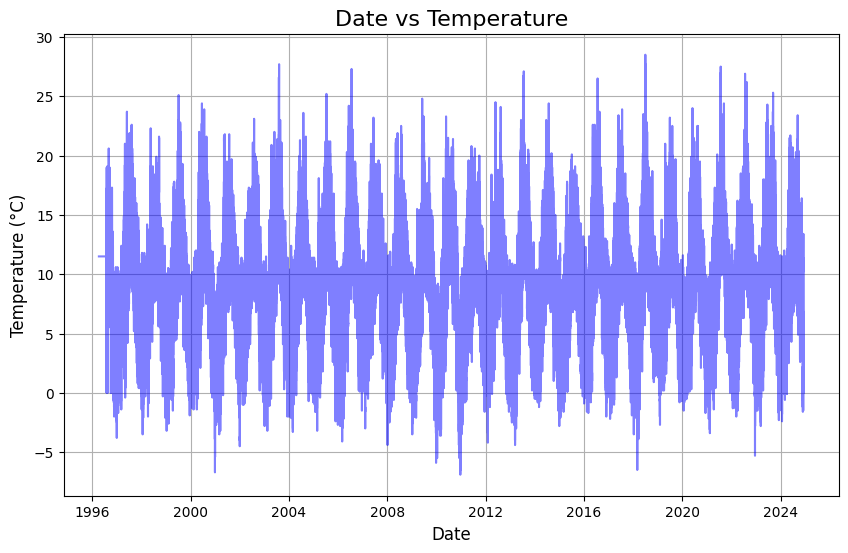

In [55]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.lineplot(data=df, x='date', y='temp', color='blue', alpha=0.5)

# Customize the plot
plt.title('Date vs Temperature', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.grid(True)

# Display the plot
plt.show()

## Splitting up the 'date' column into four different columns:

- Year
- Month
- Day
- Hour

In [56]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour

In [57]:
df.drop(columns=['date'], inplace=True)

In [58]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

In [59]:
print(df[['year', 'month', 'day', 'hour']].head())

     year  month   day  hour
0     NaN    NaN   NaN   NaN
1  1996.0    4.0  10.0  14.0
2  1996.0    7.0  31.0   8.0
3  1996.0    7.0  31.0   9.0
4  1996.0    7.0  31.0  10.0


In [60]:
# Replacing date with the new columns
cols = ['date'] + [col for col in df.columns if col != 'date']
df = df[cols]

In [61]:
df_updated = "updated_hly4935.csv"
df.to_csv(df_updated, index=False)

In [62]:
print(f"Updated file saved as {df_updated}")
print(df.head())

Updated file saved as updated_hly4935.csv
                 date ind(1)  rain  ind  temp ind(2)  wetb  dewpt  vappr  \
0                 NaT    ind  rain  ind   NaN    ind  wetb  dewpt  vappr   
1 1996-04-10 14:00:00      0   0.0    0  11.5      0   8.1    3.9    0.0   
2 1996-07-31 08:00:00      0   0.0    0  11.5      0  11.1   10.7    0.0   
3 1996-07-31 09:00:00      0   0.0    0  11.6      0  10.7    9.8    0.0   
4 1996-07-31 10:00:00      0   0.0    0  12.9      0  11.3    9.8    0.0   

   rhum  ...  ww   w  sun    vis  clht  clamt    year month   day  hour  
0  rhum  ...  ww   w  sun    vis  clht  clamt     NaN   NaN   NaN   NaN  
1     0  ...  25  81  0.0  35000    32      5  1996.0   4.0  10.0  14.0  
2     0  ...  25  82  0.0  40000    45      5  1996.0   7.0  31.0   8.0  
3     0  ...  80  81  0.0   8000    32      7  1996.0   7.0  31.0   9.0  
4     0  ...  25  82  0.0  28000    35      6  1996.0   7.0  31.0  10.0  

[5 rows x 25 columns]


## Plotting the Mean Temperature Each Day

In [63]:
# Group by year, month, and day and calculate the mean temperature
mean_temp_per_day = df.groupby(['year', 'month', 'day'])['temp'].mean().reset_index()

# Combine year, month, and day into a single 'date' column for plotting
mean_temp_per_day['date'] = pd.to_datetime(mean_temp_per_day[['year', 'month', 'day']])

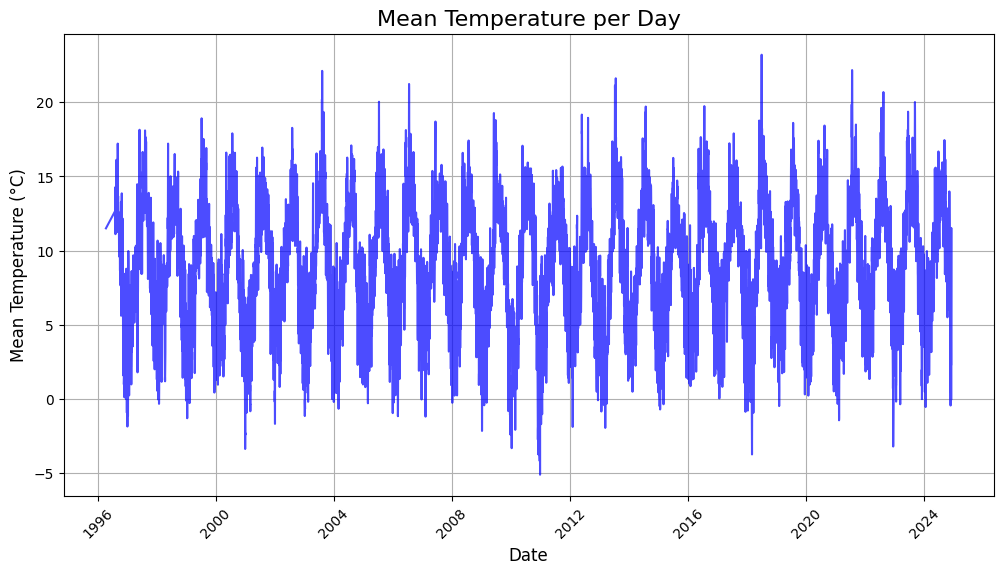

In [64]:
# Create a line plot of mean temperature per day
plt.figure(figsize=(12, 6)) 
sns.lineplot(data=mean_temp_per_day, x='date', y='temp', color='blue', alpha=0.7)


plt.title('Mean Temperature per Day', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Mean Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

plt.show()

## Plotting the Mean Temperature Each Month


In [65]:
# Group by year and month and calculate the mean temperature
mean_temp_per_month = df.groupby(['year', 'month'])['temp'].mean().reset_index()

# Combine year and month into a single 'date' column for plotting
mean_temp_per_month['date'] = pd.to_datetime(mean_temp_per_month[['year', 'month']].assign(day=1))

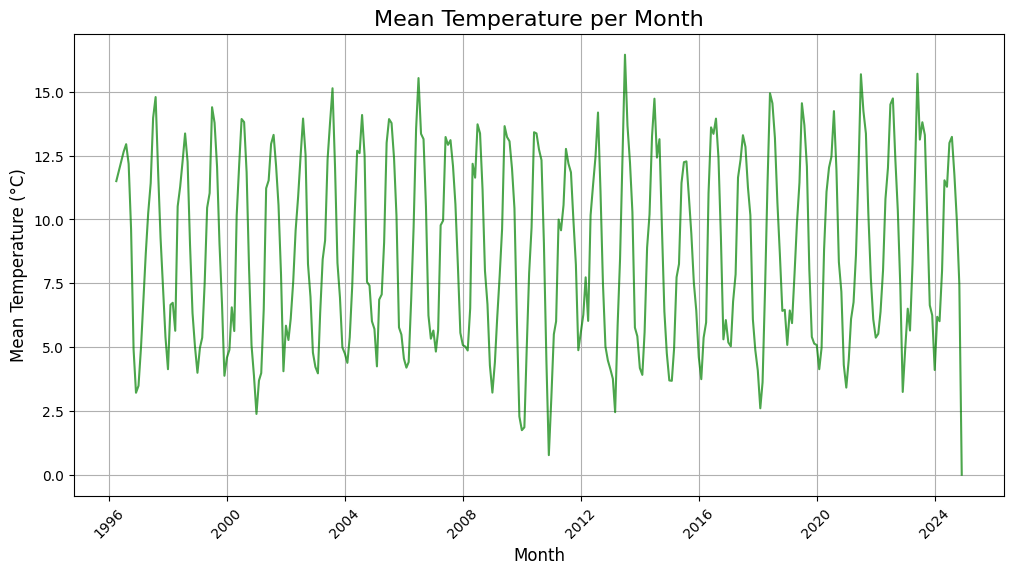

In [66]:
# Create a line plot of mean temperature per month
plt.figure(figsize=(12, 6)) 
sns.lineplot(data=mean_temp_per_month, x='date', y='temp', color='green', alpha=0.7)

plt.title('Mean Temperature per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Mean Temperature (°C)', fontsize=12)
plt.xticks(rotation=45)  
plt.grid(True)

plt.show()

## Now to Plot:

- The Windspeed 
- The rolling windspeed (over 24 hours)
- The max windspeed for each day
- The monthly mean of the daily max windspeeds 

In [67]:
columns_to_convert = ['wdsp'] 

for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce') # Due to missing data

In [68]:
df[['wdsp']]


,wdsp
0,NaN
1,0.0
2,0.0
3,0.0
4,0.0
...,...
248390,17.0
248391,16.0
248392,15.0
248393,14.0


In [69]:
isnull = df.isnull().sum()
print (isnull)

date       1
ind(1)     0
rain       0
ind        0
temp       1
ind(2)     0
wetb       0
dewpt      0
vappr      0
rhum       0
msl        0
ind(3)     0
wdsp      51
ind(4)     0
wddir      0
ww         0
w          0
sun        0
vis        0
clht       0
clamt      0
year       1
month      1
day        1
hour       1
dtype: int64


In [70]:
df = df.dropna(subset=['wdsp'])

In [71]:
describe = df[['wdsp']].describe()
print(describe)

                wdsp
count  248344.000000
mean        9.454744
std         4.935574
min         0.000000
25%         6.000000
50%         9.000000
75%        12.000000
max        50.000000


## Plotting The Daily Windspeed

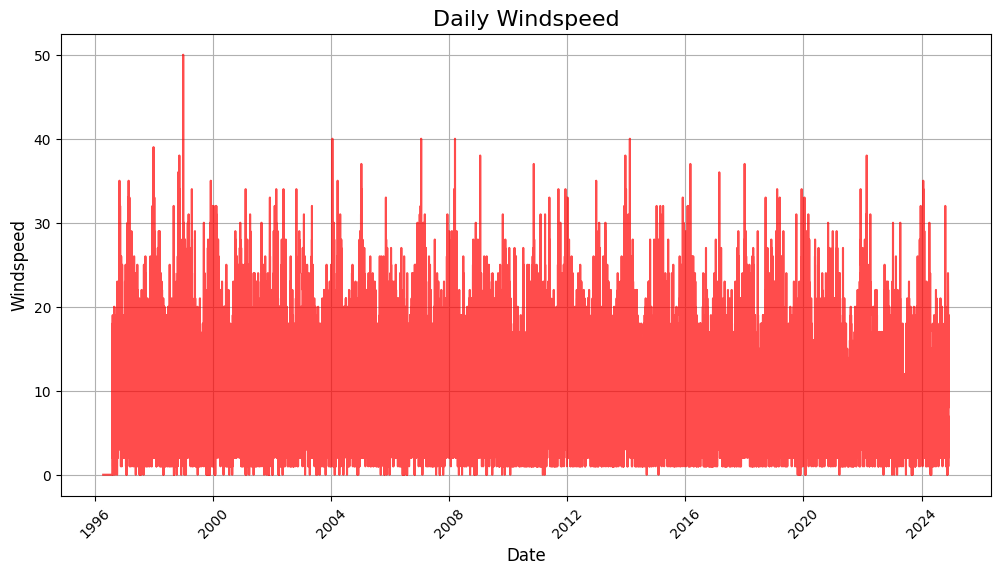

In [72]:
plt.figure(figsize=(12, 6)) 

# Pass the DataFrame as the 'data' argument
sns.lineplot(data=df, x='date', y='wdsp', color='red', alpha=0.7)

plt.title('Daily Windspeed', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Windspeed', fontsize=12)
plt.xticks(rotation=45)  
plt.grid(True)

plt.show()

## Plotting the Rolling Windspeed Over 24 Hours

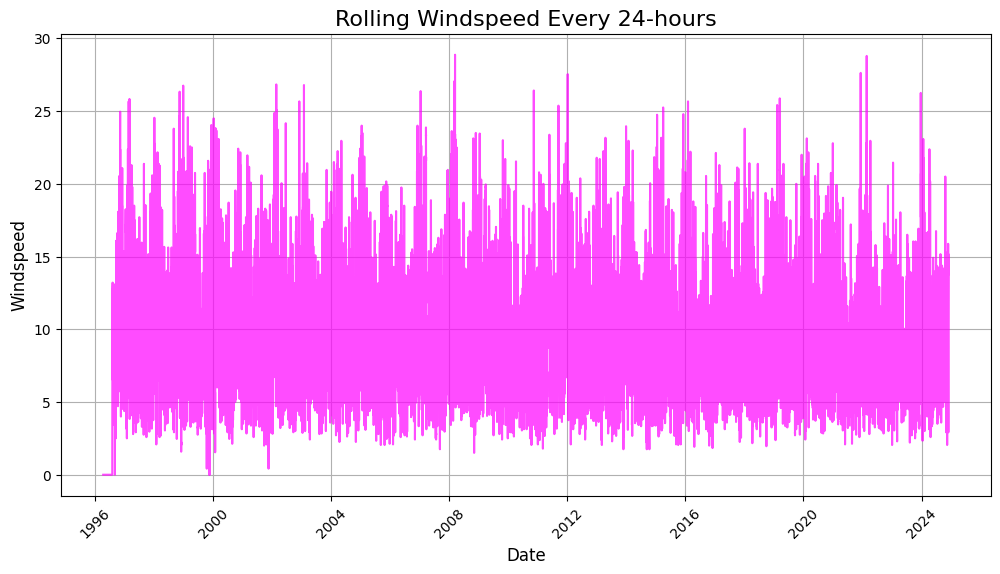

In [73]:
plt.figure(figsize=(12, 6))  

df['24HR_Rolling_WindSpeed'] = df['wdsp'].rolling(window=24, min_periods=1).mean()
sns.lineplot(data=df, x='date', y='24HR_Rolling_WindSpeed', color='magenta', alpha=0.7)

plt.title('Rolling Windspeed Every 24-hours', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Windspeed', fontsize=12)
plt.xticks(rotation=45)  
plt.grid(True)

plt.show()

## Plotting the Max Windspeed for Each Day

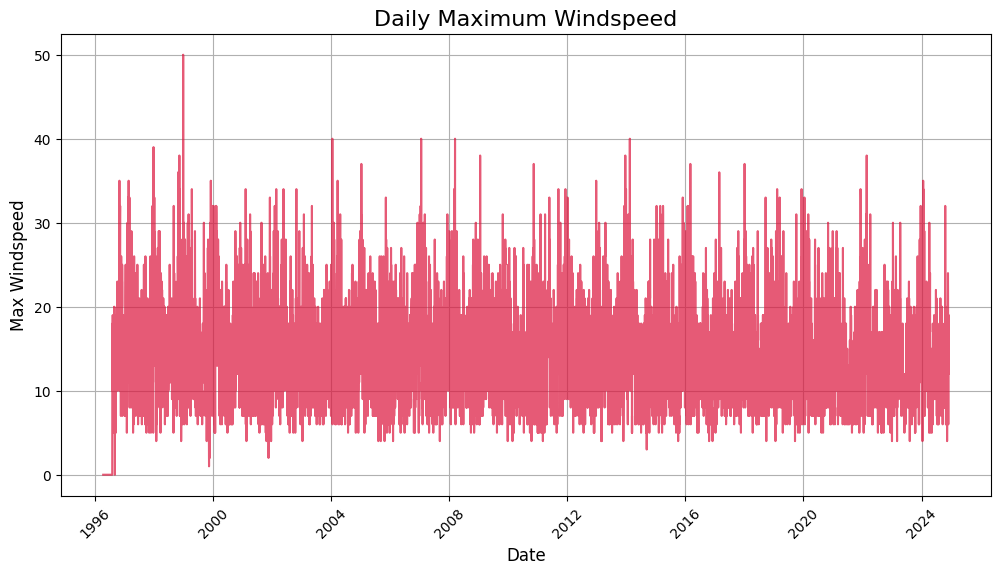

In [74]:
plt.figure(figsize=(12, 6))  

# Resample the data by day and get the daily maximum wind speed
df_daily_max = df.resample('D', on='date')['wdsp'].max()

# Convert the Series to a DataFrame
df_daily_max = df_daily_max.reset_index()

# Plot the daily maximum wind speed
sns.lineplot(data=df_daily_max, x='date', y='wdsp', color='crimson', alpha=0.7)

plt.title('Daily Maximum Windspeed', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Max Windspeed', fontsize=12)
plt.xticks(rotation=45)  
plt.grid(True)

plt.show()

## Plotting The Monthly Mean of the Daily Max Windspeeds

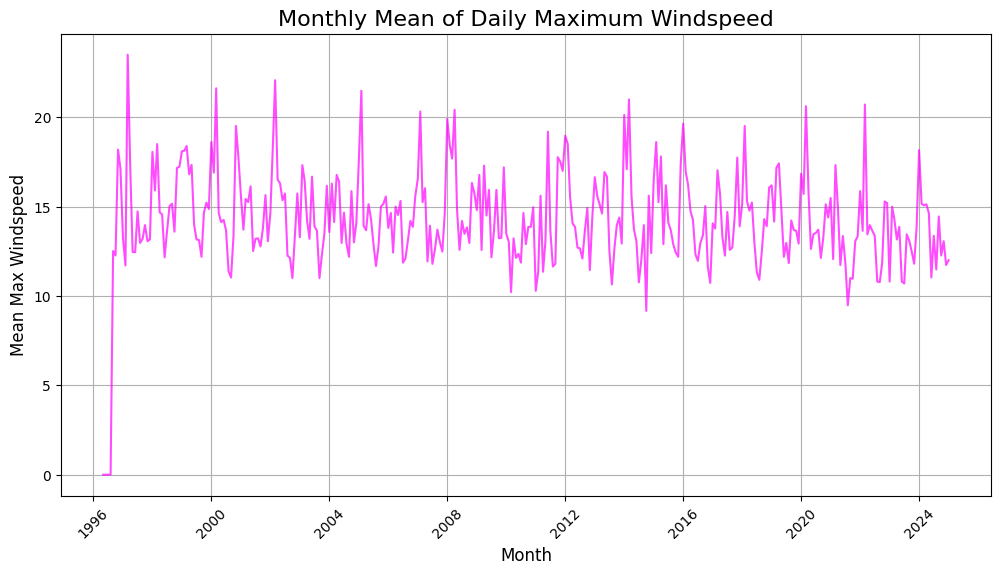

In [75]:
plt.figure(figsize=(12, 6))  

# Resample the data by day and get the daily maximum wind speed again
df_daily_max = df.resample('D', on='date')['wdsp'].max()

# Group by month and calculate the mean of daily max wind speeds
df_monthly_mean = df_daily_max.resample('ME').mean()

# Convert the Series to a DataFrame
df_monthly_mean = df_monthly_mean.reset_index()

# Plot the monthly mean of the daily maximum wind speeds
sns.lineplot(data=df_monthly_mean, x='date', y='wdsp', color='magenta', alpha=0.7)

plt.title('Monthly Mean of Daily Maximum Windspeed', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Mean Max Windspeed', fontsize=12)
plt.xticks(rotation=45)  
plt.grid(True)

plt.show()
